In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from datetime import datetime
from self_modules import *

In [2]:
from importlib.machinery import SourceFileLoader

m = SourceFileLoader("m","/export/home/agletdinov/work/git_projects/gitlab/collapse-pango-lineages/modules.py").load_module()

In [3]:
ROOT = Path().cwd().parent
DATA = ROOT / "data"

In [4]:
to_file = DATA / "ежедневный_расширенный_отчёт_2024-10-05 16-00-01.tsv.gz"
to_save = DATA.joinpath(to_file.stem + "_filt.tsv.gz")
if to_save.exists():
    print(f"Skipped")
    df_filt = pd.read_csv(to_save, sep='\t',quoting=3,
                         usecols=["id последовательности", "Дата забора", "Pangolin", "Pangolin_collapse", "дни_с_2020"],
                         dtype={"id последовательности": str,
                                "Pangolin": str,
                                "Pangolin_collapse": str,
                                "дни_с_2020": int},
                         parse_dates=['Дата забора'])
else:
    df = pd.read_csv(to_file, sep='\t',quoting=3,
                     usecols=["id последовательности", "Дата забора", "Pangolin"],
                     dtype={"id последовательности": str,
                            "Pangolin": str},
                     parse_dates=['Дата забора'])
    df_filt = df_preprocessing(df, start_date)
    print(df_filt.shape)
    df_filt.to_csv(to_save,
                   sep="\t",
                   index=False,
                   compression='gzip')

Skipped


/export/home/agletdinov/work/git_projects/temporary_qualifier-sars_cov_2/scripts/self_modules.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df.sort_values(by="Дата забора", inplace=True)


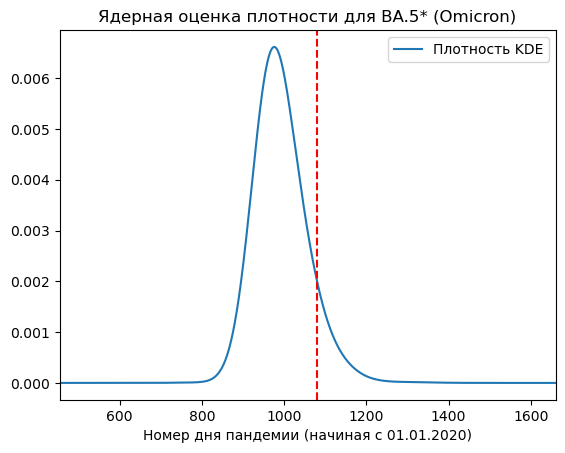

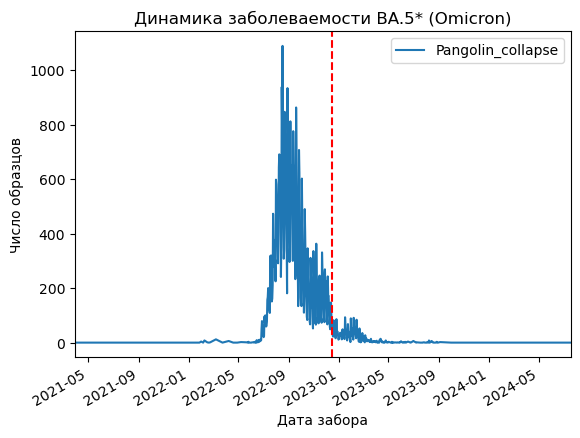

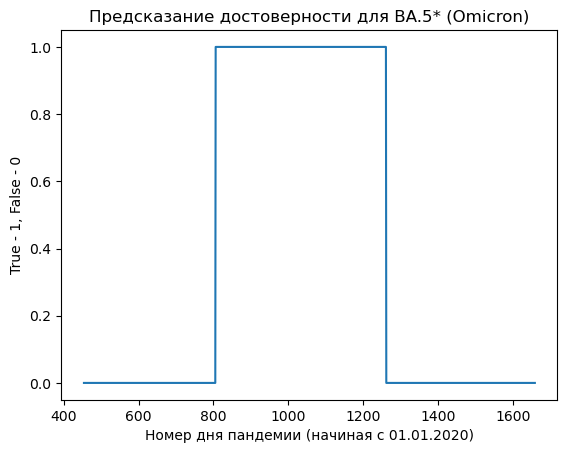

[ True]


In [5]:
strain = m.create_collapsed_strain("BA.5")#"BA.2* (Omicron)"
date = '2022-12-15'
start_date = datetime(2020, 1, 1)

create_statistics_pipe(strain=strain, date=date, df=df_filt, start_date=start_date)